# 04-01 스택이란?

데이터를 임시 저장하는 기본 자료구조인 스택과 큐

## 스택 알아보기

스택(Stack)은 데이터를 임시 저장할 떄 사용하는 자료구조로, 데이터의 입력과 출력 순서는 후입선출(LIFO)방식


- LIFO(Last In First Out)란 가장 나중에 넣은 데이터를 가장 먼저 꺼낸다는 뜻

스택에 데이터를 넣는 작업을 푸시(Push)라 하고,

스택에서 데이터를 꺼내는 작업을 팝(Pop)이라고 함

겹쳐 쌓는 접시 처럼 데이터를 넣고 꺼내는 작업을 맨 위부터 수행

- 푸시하고 팝하는 윗부분을 꼭대기(Top)라 하고,

- 아랫 부분을 바닥(bottom)이라고 함

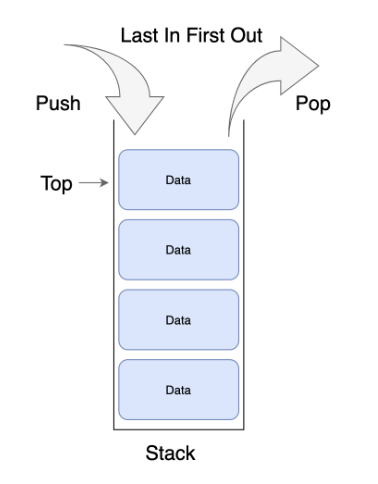

## 스택 구현하기

스택을 생성할 때 크기가 결정된 고정 길이 스택을 만들어 볼것

### 스택 배열 : stk
- 푸시한 데이터를 저장하는 스택 본체인 list형 배열 

### 스택 크기 :  capacity

- 스택의 최대 크기를 나타내는 int형 정수

- 이 값은 배열 stk의 원소 수인 len(stk)와 일치

### 스택 포인터 : ptr

- 스택에 쌓여 있는 데이터의 개수를 나타내는 정숫값을 스택 포인터(Stack pointer)라고 함

- 물론 스택이 비어 있으면 ptr의 값은 0이 되고 가득 차 있으면 capacity와 같은 값이 됨 

### 예외처리 클래스 Empty
 
 - pop() 함수 또는 peek() 함수를 호출할 때 스택이 비어 있으면 내보내는 예외 처리

### 예외 처리 클래스 Full
- push() 함수를 호출할 때 스택이 가득 차 있으면 내보내는 예외 처리

### 초기화하는 __init__() 함수

- __init__() 함수는 스택 배열을 생성하는 등의 준비 작업을 수행

- 매개변수 capacity로 전달 받은 값을 스택의 크기를 나타내는 필드인 capacity로 복사하여,
  원소 수가 capacity이고 모든 원소가 None인 리스트형 stk를 생성
  
- 스택이 비어이 있으므로 스택 포인터 ptr의 값을 0으로 함

### 쌓여 있는 데이터 개수를 알아내는 __len__() 함수

- __len__() 함수는 스택에 쌓여 있는 데이터 개수를 반환
- 스택 포인터 ptr값을 그대로 반환

### 스택이 비어 있는지를 판단하는 is_empty() 함수

- is_empty() 함수는 데이터가 하나도 쌓여 있지 않은 상태, 즉 스택이 비어 있는지 판단
- 스택이 비어 있으면 True, 그렇지 않으면 False를 반환

### 스택이 가득 차 있는지를 판단하는 is_full() 함수

- is_full() 함수는 더 이상 데이터를 푸시할 수 없는 상태, 즉 스택이 가득 차 있는지 판단

- 스택이 가득 차 있다면 True, 그렇지 않다면 False를 반환

In [2]:
# 고정 길이 스택 클래스 FixedStack 구현하기

from typing import Any

class FixedStack:
    """고정 길이 스택 클래스"""
    
    class Empty(Exception):
        """비어 있는 FixedStack에 팝 또는 피크할 떄 내보내는 예외처리"""
        pass
    
    class Full(Exception):
        """가득 찬 FixedStack에 푸시할 떄 내보내는 예외 처리"""
        pass
    
    def __init__(self, capacity: int = 256) -> None:
        """스택 초기화"""
        self.stk = [None] * capacity     # 스택 본체
        self.capacity = capacity         # 스택의 크기
        self.ptr = 0                     # 스택 포인터
        
    
    def __len__(self) -> int:
        """스택에 쌓여 있는 데이터 개수를 반환"""
        return self.ptr
    
    
    def is_empty(self) -> bool:
        """스택이 비어 있는지 판단"""
        return self.ptr <= 0
    
    def is_full(self) -> bool:
        """스택이 가득 차 있는지 판단"""
        return self.ptr >= self.capacity
    


### 데이터를  푸시하는 push() 함수

- push()함수는 스택에 데이터를 추가
- 스택이 가득 차서 더 이상 푸시 할 수 없는 경우 FixedStack.Full 통하여 예외 처리를 내보냄


### 데이터를 팝하는 pop() 함수

- pop()스택의 꼭대기에서 데이터를 꺼내서 그 값을 반환

- 스택이 비어서 팝할 수 없는 경우에는 FixedStack.Empty를 통해 예외처리를 보냄

### 데이터를 들여다 보는 peek() 함수

- peek() 함수는 스택의 꼭대기 데이터(다음에 팝하는 데이터)를 들여다 봄

- 스택이 비어있는 경우에는 FixedStack.Empty를 통하여 예외처리
- 스택이 비어있지 않으면 꼭대기 원소 stk[ptr-1]의 값을 반환
- 데이터의 입출력이 없으므로 스택 포인터는 변화하지 않음

In [4]:
# 고정 길이 스택 클래스 FixedStack 구현하기

from typing import Any

class FixedStack:
    """고정 길이 스택 클래스"""
    
    class Empty(Exception):
        """비어 있는 FixedStack에 팝 또는 피크할 떄 내보내는 예외처리"""
        pass
    
    class Full(Exception):
        """가득 찬 FixedStack에 푸시할 떄 내보내는 예외 처리"""
        pass
    
    def __init__(self, capacity: int = 256) -> None:
        """스택 초기화"""
        self.stk = [None] * capacity     # 스택 본체
        self.capacity = capacity         # 스택의 크기
        self.ptr = 0                     # 스택 포인터
        
    
    def __len__(self) -> int:
        """스택에 쌓여 있는 데이터 개수를 반환"""
        return self.ptr
    
    
    def is_empty(self) -> bool:
        """스택이 비어 있는지 판단"""
        return self.ptr <= 0
    
    def is_full(self) -> bool:
        """스택이 가득 차 있는지 판단"""
        return self.ptr >= self.capacity
    
    def push(self, value:Any) -> None:
        """스택에 value를 푸시(데이터를 넣음)"""
        if self.is_full(): # 스택이 가득 차 있는 경우
            raise FixedStack.Full # 예외처리 발생
        self.stk[self.ptr] = value
        self.ptr += 1
        
    def pop(self) -> Any:
        """스택에서 데이터를 팝(꼭대기 데이터를 꺼냄)"""
        if self.is_empty(): # 스택이 비어 있는 경우
            raise FixedStack.Empty # 예외처리
        self.ptr -= 1
        return self.stk[self.ptr]
    
    def peek(self)->Any:
        """스택에서 데이터를 피크(꼭대기 데이터를 들여다봄)"""
        if self.is_empty(): # 스택이 비어있음
            raise FixedStack.Empty  # 예외 처리 발생
            
        return self.stk[self.ptr - 1]
    
    def clear(self) -> None:
        """스택을 비움(모든 데이터를 삭제)"""
        self.ptr = 0
        

### 스택의 모든 데이터를 삭제하는 clear() 함수

- clear() 함수는 스택에 쌓여 있는 데이터를 모두 삭제하여 빈 스택을 만듬
- 스택 포인터 ptr의 값을 0으로 하면 끝남

### 데이터를 검색하는 find() 함수

- find() 함수는 스택 본체의 배열 stk안에 value와 값이 같은 데이터가 포함되어 있는지 확인
- 포함되어 있다면 배열의 어디에 들어 있는지를 검색
- 검색에 성공하면 발견한 원소의 인덱스를 반환하고 실패하면 -1을 반환

### 데이터 개수를 세는 count() 함수
- count() 함수는 스택에 쌓여 있는 데이터(value)의 개수를 구하여 반환

### 데이터가 포함되어 있는지 판단하는 __contains__() 함수

- __contains__()함수는 스택에 데이터(value)가 있는지 판단
- 있으면 True, 없으면 False를 반환

In [5]:
# 고정 길이 스택 클래스 FixedStack 구현하기

from typing import Any

class FixedStack:
    """고정 길이 스택 클래스"""
    
    class Empty(Exception):
        """비어 있는 FixedStack에 팝 또는 피크할 떄 내보내는 예외처리"""
        pass
    
    class Full(Exception):
        """가득 찬 FixedStack에 푸시할 떄 내보내는 예외 처리"""
        pass
    
    def __init__(self, capacity: int = 256) -> None:
        """스택 초기화"""
        self.stk = [None] * capacity     # 스택 본체
        self.capacity = capacity         # 스택의 크기
        self.ptr = 0                     # 스택 포인터
        
    
    def __len__(self) -> int:
        """스택에 쌓여 있는 데이터 개수를 반환"""
        return self.ptr
    
    
    def is_empty(self) -> bool:
        """스택이 비어 있는지 판단"""
        return self.ptr <= 0
    
    def is_full(self) -> bool:
        """스택이 가득 차 있는지 판단"""
        return self.ptr >= self.capacity
    
    def push(self, value:Any) -> None:
        """스택에 value를 푸시(데이터를 넣음)"""
        if self.is_full(): # 스택이 가득 차 있는 경우
            raise FixedStack.Full # 예외처리 발생
        self.stk[self.ptr] = value
        self.ptr += 1
        
    def pop(self) -> Any:
        """스택에서 데이터를 팝(꼭대기 데이터를 꺼냄)"""
        if self.is_empty(): # 스택이 비어 있는 경우
            raise FixedStack.Empty # 예외처리
        self.ptr -= 1
        return self.stk[self.ptr]
    
    def peek(self)->Any:
        """스택에서 데이터를 피크(꼭대기 데이터를 들여다봄)"""
        if self.is_empty(): # 스택이 비어있음
            raise FixedStack.Empty  # 예외 처리 발생
            
        return self.stk[self.ptr - 1]
    
    def clear(self) -> None:
        """스택을 비움(모든 데이터를 삭제)"""
        self.ptr = 0
        
    def find(self, value:Any) -> Any:
        """스택에서 value를 찾아 인덱스를 반환(없으면 -1을 반환)"""
        for i in range(self.ptr -1, -1, -1): # 꼭대기 쪽부터 선형 검색
            if self.stk[i] == value:
                return i # 검색 성공
        return -1 # 검색 실패
    
    def count(self, value:Any) -> bool:
        """스택에 있는 value의 개수를 반환"""
        c = 0
        for i in range(self.ptr): # 바닥 쪽부터 선형 검색 ? 이게 맞나 ? 
            if self.stk[i] == value: # 검색 성공
                c += 1
        return c 
    
    
    def __contains__(self, value: Any) -> bool:
        """스택에 value가 있는지 판단"""
        return self.count(value)
    
    def dump(self)-> None:
        """덤프(스택 안의 모든 데이터를 바닥부터 꼭대기 순으로 출력)"""
        if self.is_empty():
            print("스택이 비어 있습니다.")
        else:
            print(self.stk[:self.ptr])
            

### 스택의 모든 데이터를 출력하는 dump() 함수
- dump() 함수는 스택에 쌓여 있는 ptr개의 모든 데이터를 바닥부터 꼭대기까지 순서대로 출력
- 스택이 비어 있으면 '스택이 비어 있습니다.'를 출력

## 스택 프로그램 만들기

In [9]:
# 고정 길이 스택 클래스 (FixedStack)를 사용하기

from enum import Enum

Menu = Enum("Menu",["푸시","팝","피크","검색","덤프","종료"])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f"({m.value}){m.name}" for m in Menu ]
    while True:
        print(*s, sep= "    ", end='')
        n = int(input(': '))
        if  1<= n <= len(Menu):
            return Menu(n)
        
s = FixedStack(64) # 최대 64개를 푸시할수 있는 스택

while True:
    print(f"현재 데이터 개수 : {len(s)} / {s.capacity}")
    menu = select_menu() # 메뉴 선택
    
    if menu == Menu.푸시: # 푸시
        x = int(input('데이터를 입력하세요.: '))
        try:
            s.push(x)
        except FixedStack.Full:
            print("스택이 가득 차 있습니다.")
            
    elif menu == Menu.팝: # 팝
        try:
            x = s.pop()
            print(f"팝한 데이터는 {x}입니다.")
        except FixedStack.Empty:
            print("스택이 비어 있습니다.")
            
    elif menu == Menu.피크:
        try:
            x = s.peek()
            print(f"피크한 데이터는 {x}입니다.")
        except FixedStack.Empty:
            print("스택이 비어 있습니다.")
            
    elif menu == Menu.검색: # 검색
        x = int(input("검색할 값을 입력하세요.: "))
        if x in s:
            print(f"{s.count(x)}개 포함되고, 맨 앞의 위치는 {s.find(x)}입니다.")
        else:
            print("검색할 값을 찾을 수 없습니다.")
            
            
    elif menu == Menu.덤프: # 덤프
        s.dump()
        
    else:
        break

현재 데티어 개수 : 0 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 1
데이터를 입력하세요.: 1
현재 데티어 개수 : 1 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 1
데이터를 입력하세요.: 2
현재 데티어 개수 : 2 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 1
데이터를 입력하세요.: 3
현재 데티어 개수 : 3 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 1
데이터를 입력하세요.: 1
현재 데티어 개수 : 4 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 1
데이터를 입력하세요.: 5
현재 데티어 개수 : 5 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 4
검색할 값을 입력하세요.: 1
2개 포함되고, 맨 앞의 위치는 3입니다.
현재 데티어 개수 : 5 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 3
피크한 데이터는 5입니다.
현재 데티어 개수 : 5 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 2
팝한 데이터는 5입니다.
현재 데티어 개수 : 4 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 5
[1, 2, 3, 1]
현재 데티어 개수 : 4 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 2
팝한 데이터는 1입니다.
현재 데티어 개수 : 3 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 1
데이터를 입력하세요.: 1
현재 데티어 개수 : 4 / 64
(1

### collections.deque로 스택 구현하기

- 파이썬 내장 컨테이너는 딕셔너리(dictionary), 리스트(list), 집합(set), 튜플(tuple)이 있음

- 이 외에도 여러 컨테이너를 collections 모듈로 제공

- 주요 컨테이너는 namedtuple, deque, ChainMap, Counter, OrderdDict, defaultdict, UserDict, UserList, UserString 같은 컬렉션  

- 이 가운데 deque 모듈을 사용하면 스택을 간단하게 구현할 수 있음

- collection.deque는 맨 앞과 맨 끝 양쪽에서 원소를 추가 삭제 하는 자료구조인 덱(deque)을 구현하는 컨테이너

#### deque의 주요 속성과 함수

##### maxlen 속성
- deque의 최대 크기를 나타내는 속성으로 읽기 전용
- 크기 제한이 없으면 None

##### append(x) 함수
- deque 맨 끝(오른쪽)에 x를 추가

##### appendleft(x) 함수
- deque 맨 앞(왼쪽)에 x를 추가

##### clear() 함수
- deque의 모든 원소를 삭제하고 크기를 0으로 함

##### copy() 함수
- deque를 얕은 복사(shallow copy)를 함

##### count(x) 함수
- deque 안에 있는 x와 같은 원소의 개수를 계산

##### extend(iterable) 함수
- 순차 반복 인수 iterable에서 가져온 원소를 deque의 맨 끝(오른쪽)에 추가하여 확장

##### extendleft(iterable) 함수
- 순차 반복 인수 iterable에서 가져온 원소를 deque의 맨 앞(왼쪽)에 추가하여 확장

##### index(x[, start [,stop] ] 함수
- deque 안에 있는 (인덱스 start부터 인덱스 stop까지 양 끝을 포함한 범위) x 가운데 
  가장 앞쪽에 있는 원소의 위치를 반환 
- x가 없는 경우 ValueError를 보냄

##### insert(i, x) 함수
- x를 deque의 i의 위치에 삽입
- 이때 크기에 제한이 있는 deque일 경우 maxlen을 초과한 삽입은 IndexError를 보냄

##### pop() 함수
- deque의 맨 끝(오른쪽)에 있는 원소를 1개 삭제하고 그 원소를 반환
- 원소가 하나도 없는 경우에는 IndexError를 내보냄

##### popleft() 함수
- deque의 맨 앞(왼쪽)에 있는 원소를 1개 삭제하고 그 원소를 반환
- 원소가 하나도 없는 경우에는 IndexError를 내보냄

##### remove(value) 함수
- value의 첫 번째 항목을 삭제
- 원소가 없는 경우에는 ValueError를 내보냄

##### reverse() 함수
- deque 원소를 역순으로 재정렬하고 None을 반환

##### rotate(n =1) 함수
- deque의 모든 원소를 n값만큼 오른쪽으로 밀어냄
- n이 음수라면 왼쪽으로 밀어냄

- 이 외에도 이터레이션과 pickle, len(d), reversed(d), copy.copy(d), copy.deepcopy(d), 
  in 연산자로 멤버십 판단, d[0]등의 형식에서 인덱스에 의한 참조를 지원
  
- 양쪽 끝의 데이터를 인덱스로 접근하는 것은 O(1)로 빠르지만,
  가운데 부분에 있는 데이터를 접근하는것은 O(n)으로 느림
  
- 인덱스를 사용하여 임의의 원소를 무작위로 접근하는 것은 효율적이지 않음

In [10]:
# 고정 길이 스택 클래스 구현하기(collection.deque를 사용)

from typing import Any
from collections import deque

class Stack:
    """고정 길이 스택 클래스(Collections.deque를 사용)"""
    
    def __init__(self, maxlen: int = 256) -> None:
        """스택 초기화"""
        self.capacity = maxlen
        self.__stk = deque([], maxlen)
        
    def __len__(self) -> int:
        """스택에 쌓여 있는 데이터 개수를 반환"""
        return len(self.__stk)
    
    def is_empty(self) -> bool:
        """스택이 비어있는지 확인"""
        return not self.__stk
    
    def is_full(self) -> bool:
        """스택이 가득 차 있는지 판단"""
        return len(self.__stk) == self.__stk.maxlen
    
    def push(self, value:Any)-> None:
        """스택에 value를 푸시"""
        self.__stk.append(value)
    
    def pop(self) -> Any:
        """스택에 데이터를 팝"""
        return self.__stk.pop()
    
    def peek(self) -> Any:
        """스택에서 데이터를 피크"""
        return self.__stk[-1]
    
    def clear(self) -> None:
        """스택을 비움"""
        self.__stk.clear()
        
    def find(self, value: Any) -> Any:
        """스택에서 value를 찾아 인덱스를 반환(찾지 못하면 -1을 반환)"""
        try:
            return self.__stk.index(value)
        except ValueError:
            return -1
        
    def count(self, value:Any)->int:
        """스택에 포함되어 있는 value의 개수를 반환"""
        return self.__stk.count(value)
    
    def __contains__(self, value: Any) -> bool:
        """스택에 value가 포함되어 있는지 판단"""
        return self.count(value)
    
    def dump(self)-> int:
        """스택 안에 있는 모든 데이터를 나열(바닥부터 꼭대기 순으로 출력)"""
        print(list(self.__stk))
        
        
        
from enum import Enum

Menu = Enum("Menu",["푸시","팝","피크","검색","덤프","종료"])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f"({m.value}){m.name}" for m in Menu ]
    while True:
        print(*s, sep= "    ", end='')
        n = int(input(': '))
        if  1<= n <= len(Menu):
            return Menu(n)
        
s = Stack(64) # 최대 64개를 푸시할수 있는 스택

while True:
    print(f"현재 데이터 개수 : {len(s)} / {s.capacity}")
    menu = select_menu() # 메뉴 선택
    
    if menu == Menu.푸시: # 푸시
        x = int(input('데이터를 입력하세요.: '))
        try:
            s.push(x)
        except FixedStack.Full:
            print("스택이 가득 차 있습니다.")
            
    elif menu == Menu.팝: # 팝
        try:
            x = s.pop()
            print(f"팝한 데이터는 {x}입니다.")
        except FixedStack.Empty:
            print("스택이 비어 있습니다.")
            
    elif menu == Menu.피크:
        try:
            x = s.peek()
            print(f"피크한 데이터는 {x}입니다.")
        except FixedStack.Empty:
            print("스택이 비어 있습니다.")
            
    elif menu == Menu.검색: # 검색
        x = int(input("검색할 값을 입력하세요.: "))
        if x in s:
            print(f"{s.count(x)}개 포함되고, 맨 앞의 위치는 {s.find(x)}입니다.")
        else:
            print("검색할 값을 찾을 수 없습니다.")
            
            
    elif menu == Menu.덤프: # 덤프
        s.dump()
        
    else:
        break

현재 데이터 개수 : 0 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 1
데이터를 입력하세요.: 56
현재 데이터 개수 : 1 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 1
데이터를 입력하세요.: 654
현재 데이터 개수 : 2 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 1
데이터를 입력하세요.: 456465
현재 데이터 개수 : 3 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 3
피크한 데이터는 456465입니다.
현재 데이터 개수 : 3 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 5
[56, 654, 456465]
현재 데이터 개수 : 3 / 64
(1)푸시    (2)팝    (3)피크    (4)검색    (5)덤프    (6)종료: 6


---

---

# 04-2 큐란?

큐(queue)는 스택과 같이 데이터를 임시 저장하는 자료구조

## 큐 알아보기

가장 먼저 넣은 데이터를 가장 먼저 꺼내는 선입선출(FIFO)구조

예로 은행 창구에서 차례를 기다리거나 마트에서 계산을 기다리는 줄과 같음

- 큐에 데이터를 추가하는 작업을 인큐(enqueue)

- 큐에서 데이터를 꺼내는 작업을 디큐(dequeue)

- 데이터를 꺼내는 쪽을 프론트(front)

- 데이터를 넣는 쪽을 리어(rear)

## 배열로 큐 구현하기

### 우선순위 큐(priority queue) 

- 인큐할 때는 데이터에 우선순위를 부여하고 추가

- 디큐할때 우선순위가 가장 높은 데이터를 꺼내는 방식

- 파이썬에서 우선순위를 부여하는 큐를 heapq모듈에서 제공

- heap에서 data의 인큐는 heapq.heappush(heap, data)로 수행

- 디큐는 heappq.heapppop(heap)으로 수행 

## 링 버퍼로 큐 구현하기

- 디큐할 때 배열 안의 원소를 옮기지 않는 큐를 구현

- 이럴 때 사용하는 자료구조가 링 버퍼(ring buffer)

- 배열 맨 끝의 원소 뒤에 맨 앞의 원소가 연결되는 자료구조

- 어떤 원소가 맨 앞 원소이고, 어떤 원소가 맨 끝 원소인지 식별하는 변수가 각각 front와 rear

- 프런트와 리어는 논리적인 데이터 순서일 뿐 배열의 물리적 원소의 순서는 아님

In [1]:
# 고정 길이 큐 클래스 FixedQueue 구현하기

from typing import Any

class FixedQueue:
    
    class Empty(Exception):
        """비어 있는 FixedQueue에서 디큐 또는 피크할 떄 내보내는 예외 처리"""
        pass
    
    class Full(Exception):
        """가득 차 있는 FixedQueue에서 인큐할 떄 내보내는 예외 처리"""
        pass
    
    def __init__(self, capacity: int)-> None:
        """큐 초기화"""
        self.no = 0                  # 현재 데이터 개수
        self.front = 0               # 맨 앞 원소 커서
        self.rear = 0                # 맨 끝 원소 커서
        self.capacity = capacity     # 큐의 크기
        self.que = [None] * capacity # 큐의 본체
        
    def __len__(self) -> int:
        """큐에 있는 모든 데이터 개수를 반환"""
        return self.no
    
    def is_empty(self) -> bool:
        """큐가 비어 있는지 판단"""
        return self.no <= 0
    
    def is_full(self) -> bool:
        """큐가 가득 차 있는지 판단"""
        return self.no >= self.capacity
    


## 예외처리 클래스 Empty와 Full

- 비어 있는 큐에 deque(), peek() 함수를 호출할 때 내보내는 예외 처리는 Empty 클래스

- 가득 차 있는 큐에 enqueue()함수를 호출할 때 내보내는 예외처리는 Full 클래스

## 초기화하는 __init__() 함수

- __init__() 함수는 큐 배열으 생성하는 등의 준비 작업

    - que : 큐의 배열로서 밀어 넣는 데이터를 저장하는 list형 배열
    - capacity : 큐의 최대 크기를 나타내는 int형 정수 , 이 값은 배열 que의 원소 수와 일치
    - front, rear: 맨 앞의 원소, 맨 끝의 원소를 나타내는 인덱스
                   큐에 넣은 데이터 중 가장 처음에 넣은 맨 앞 원소의 인덱스가 front 
                   가장 마지막에 넣으 맨 끝 원소의 바로 다음 인덱스가 rear
    - no : 큐에 쌓여 있는 데이터 개수를 나타내는 int형 정수
    
## 추가한 데이터 개수를 알아내는 __len__() 함수

## 큐가 비어 있는지 판단하는 is_empty() 함수

## 큐가 가득 차 있는지 판단하는 is_full() 함수


## 데이터를 넣는 enque() 함수

- enque() 함수는 큐에 데이터를 인큐함
- 하지만 큐가 가득 차서 인큐할 수 없는 경우 예외 처리인 FixedQueue.Full을 내보냄

In [ ]:
def enque(self, x:Any) -> None:
    """데이터 x를 인큐"""
    if self.is_full():
        raise FixedQueue.Full # 큐가 가득 차 있는 경우 예외처리 발생
    self.que[self.rear] = x
    self.rear += 1
    self.no += 1
    if self.rear == self.capacity:
        self.rear = 0
        

## 데이터를 꺼내는 deque() 함수

- deque() 함수는 큐의 맨 앞부터 데이터를 디큐하여 그 값을 반환
- 그러나 큐가 비어 있어 디큐할수 없는 경우 예외처리인 FixedQueue.Empty를 내보냄

In [ ]:
def deque(self)-> Any:
    """데이터를 디큐"""
    if self.is_empty():
        raise FixedQueue.Empty # 큐가 비어 있는 경우 예외 처리 발생
    x = self.que[self.front]
    self.front += 1
    self.no -= 1
    if self.front == self.capacity:
        self.front = 0
    return x 


## 데이터를 들여다 보는 peek() 함수

- peek()함수는 맨 앞 데이터, 즉 다음 디큐에서 꺼낼 데이터를 들여다 봄
- que[front]의 값을 반환할 뿐 데이터를 꺼내지 않으므로 front, rear, no의 값은 변하지 않음
- 큐가 비어 있을 때는 예외처리 FixedQueue.Empty를 내보냄

## 검색하는 find() 함수

- 큐의 배열에서 value와 같은 데이터가 포함되어 있는 위치를 알아냄

- 맨 앞에서 맨 끝으로 선형 검색을 수행

- 큐의 맨 앞 원소(front)부터 시작

- 스캔할 때 주목하는 인덱스 idx를 구하는 식은 (i +front) % capacity

## 데이터 개수를 세는 count() 함수

- count() 함수는 큐에 있는 데이터(value)의 개수를 구하여 반환


## 데이터가 포함되어 있는지 판단하는 __contains__() 함수

- __contains__() 함수는 큐에 데이터(value)가 들어 있는지를 판단
- 들어 있으면 True, 그렇지 않으면 False를 반환
- 내부의 count()함수를 호출하여 구현

## 큐의 전체 원소를 삭제하는 clear() 함수

- clear() 함수는 현재 큐에 들어 있는 모든 데이터를 삭제
- 인큐와 디큐는 no, front, rear의 값을 바탕으로 수행
- 그러므로 값을 0으로 하면됨 실제 원솟값을 변경할 필요가 없음

## 큐의 전체 데이터를 출력하는 dump() 함수
- dump() 함수는 큐에 들어 있는 모든 데이터를 맨 앞부터 맨 끝 쪽으로 순서대로 출력
- 큐가 비어 있으면 '큐가 비어 있습니다'를 출력

In [ ]:
def peek(self)-> Any:
    """큐에서 데이터를 피크(맨 앞 데이터를 들여다봄)"""
    if self.is_empty():
        raise FixedQueue.Empty # 큐가 비어 있는 경우 예외 처리를 발생
    return self.que[self.front]


def find(self, value: Any) -> Any:
    """큐에서 value를 찾아 인덱스를 반환(없으면 -1을 반환)"""
    for i in range(self.no):
        idx = (i + self.front) % self.capacity
        if self.que[idx] == value:     # 검색 성공
            return idx
    return -1                          # 검색 실패


def count(self, value:Any) -> bool:
    """큐에 있는 value의 개수를 반환"""
    c = 0
    for i in range(self.no):
        idx = (i + self.front) % self.capacity
        if self.que[idx] == value:
            c += 1
    return c


def __contains__(self, value:Any) -> bool:
    """큐에 value가 있는지 판단"""
    return self.count(value)


def clear(self) -> None:
    """큐의 모든 데이터를 비움"""
    self.no = self.front = self.rear = 0
    
def dump(self) -> None:
    """모든 데이터를 맨 앞부터 맨 끝 순으로 출력"""
    if self.is_empty():                # 큐가 비어있음
        print("큐가 비었습니다.")
    else:
        for i in range(self.no):
            print(self.que[(i + self.front) % self.capacity], end='')
        print()
        

### 양방향 대기열 덱의 구조

- 양방향 대기열인 덱(deque)은 맨 앞과 맨 끝 양쪽에서 데이터를 넣고 꺼낼 수 있는 자료구조
- 파이썬에서는 collections.deque 컨테이너로 제공

## 덱이란?

- 덱(deque: double-ended queue)은 맨 앞과 맨 끝 양쪽에서 데이터를 모두 삽입 삭제 할수 있는 자료구조
- 2개의 포인터를 사용하여 양쪽에서 삭제 삽입을 할 수 있으며, 큐와 스택을 합친 형태라고 생각

## 링 버퍼로 큐 프로그램 만들기


In [2]:
# 고정 길이 큐 클래스 FixedQueue 구현하기

from typing import Any

class FixedQueue:
    
    class Empty(Exception):
        """비어 있는 FixedQueue에서 디큐 또는 피크할 때 내보내는 예외 처리"""
        pass
    
    class Full(Exception):
        """가득 차 있는 FixedQueue에서 인큐할 떄 내보내는 예외 처리"""
        pass
    
    def __init__(self, capacity: int)-> None:
        """큐 초기화"""
        self.no = 0                  # 현재 데이터 개수
        self.front = 0               # 맨 앞 원소 커서
        self.rear = 0                # 맨 끝 원소 커서
        self.capacity = capacity     # 큐의 크기
        self.que = [None] * capacity # 큐의 본체
        
    def __len__(self) -> int:
        """큐에 있는 모든 데이터 개수를 반환"""
        return self.no
    
    def is_empty(self) -> bool:
        """큐가 비어 있는지 판단"""
        return self.no <= 0
    
    def is_full(self) -> bool:
        """큐가 가득 차 있는지 판단"""
        return self.no >= self.capacity
    
    
    def enque(self, x:Any) -> None:
        """데이터 x를 인큐"""
        if self.is_full():
            raise FixedQueue.Full # 큐가 가득 차 있는 경우 예외처리 발생
        self.que[self.rear] = x
        self.rear += 1
        self.no += 1
        if self.rear == self.capacity:
            self.rear = 0

    
    def deque(self)-> Any:
        """데이터를 디큐"""
        if self.is_empty():
            raise FixedQueue.Empty # 큐가 비어 있는 경우 예외 처리 발생
        x = self.que[self.front]
        self.front += 1
        self.no -= 1
        if self.front == self.capacity:
            self.front = 0
        return x 


    def peek(self)-> Any:
        """큐에서 데이터를 피크(맨 앞 데이터를 들여다봄)"""
        if self.is_empty():
            raise FixedQueue.Empty # 큐가 비어 있는 경우 예외 처리를 발생
        return self.que[self.front]


    def find(self, value: Any) -> Any:
        """큐에서 value를 찾아 인덱스를 반환(없으면 -1을 반환)"""
        for i in range(self.no):
            idx = (i + self.front) % self.capacity
            if self.que[idx] == value:     # 검색 성공
                return idx
        return -1                          # 검색 실패


    def count(self, value:Any) -> bool:
        """큐에 있는 value의 개수를 반환"""
        c = 0
        for i in range(self.no):
            idx = (i + self.front) % self.capacity
            if self.que[idx] == value:
                c += 1
        return c


    def __contains__(self, value:Any) -> bool:
        """큐에 value가 있는지 판단"""
        return self.count(value)


    def clear(self) -> None:
        """큐의 모든 데이터를 비움"""
        self.no = self.front = self.rear = 0

    def dump(self) -> None:
        """모든 데이터를 맨 앞부터 맨 끝 순으로 출력"""
        if self.is_empty():                # 큐가 비어있음
            print("큐가 비었습니다.")
        else:
            for i in range(self.no):
                print(self.que[(i + self.front) % self.capacity], end='')
            print()



In [12]:
# 고정 길이 큐 클래스를 사용하기

from enum import Enum

Menu = Enum("Menu",['인큐', '디큐', '피크', '검색', '덤프', '종료'])

def select_menu() -> Menu:
    """메뉴 선택"""
    s = [f'({m.value}){m.name}' for m in Menu]
    while True:
        print(*s, sep='   ', end='')
        n = int(input(": "))
        if 1 <= n <= len(Menu):
            return Menu(n)
        

q = FixedQueue(8) # 최대 64개를 인큐할 수 있는 큐

while True:
    print(f"현재 데이터 개수: {len(q)} / {q.capacity}")
    menu = select_menu() # 메뉴 선택
    
    if menu == Menu.인큐: # 인큐
        x = int(input("인큐할 데이터를 입력하세요. : "))
        try:
            q.enque(x)
        except FixedQueue.Full:
            print("큐가 가득 찼습니다.")
    
    
    elif menu == Menu.디큐: # 디큐
        try:
            x = q.deque()
            print(f'디큐한 데이터는 {x}입니다.')
        except FixedQueue.Empty:
            print("큐가 비어 있습니다.")
            
    elif menu == Menu.피크: # 피크
        try:
            x = q.peek()
            print(f"피크한 데이터는 {x}입니다.")
        except FixedQueue.Empty:
            print("큐가 비었습니다.")

    elif menu == Menu.검색: # 검색
        x = int(input("검색할 값을 입력하세요. : "))
        if x in q:
            print(f'{q.count(x)}개 포함되고, 맨 앞의 위치는 {q.find(x)}입니다.')
        else:
            ("검색값을 찾을 수 없습니다.")
            
    elif menu == Menu.덤프: # 덤프
        q.dump()
    else:
        break

현재 데이터 개수: 0 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요. : 1
현재 데이터 개수: 1 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요. : 1
현재 데이터 개수: 2 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요. : 1
현재 데이터 개수: 3 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요. : 1
현재 데이터 개수: 4 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요. : 1
현재 데이터 개수: 5 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요. : 1
현재 데이터 개수: 6 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요. : 1
현재 데이터 개수: 7 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요. : 1
현재 데이터 개수: 8 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 1
인큐할 데이터를 입력하세요. : 1
큐가 가득 찼습니다.
현재 데이터 개수: 8 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 2
디큐한 데이터는 1입니다.
현재 데이터 개수: 7 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)덤프   (6)종료: 2
디큐한 데이터는 1입니다.
현재 데이터 개수: 6 / 8
(1)인큐   (2)디큐   (3)피크   (4)검색   (5)

ValueError: invalid literal for int() with base 10: ''